# Example of use of the mlexplorer() function

Author: Charles Le Losq

The mlexplorer function calls the rampy.mlexplorer class, currently in development. It aims to allow exploring sets of spectroscopic data with using principal component analysis or non-negative matrix factorization for instance. For now the work-in-progress version of this function is made available in this notebook.

It will perform automatic data scaling and provides access to popular data mining algorithms from scikit-learn.

Main goal is to provide easy access to PCA, NMF and so on. It is not intended to perform multivariate curve resolution analysis, which is the goal of the PyMCR library that integrates well with Rampy in Python for instance. A Julia version still remains to be implemented, and could be part of Spectra in the future.

Any help/feedback is more than welcome!

In [1]:
using Spectra, PyPlot

┌ Info: Recompiling stale cache file /home/charles/.julia/compiled/v1.1/Spectra/1ZxqJ.ji for Spectra [391af1a9-06f1-59d3-8d21-0be089654739]
└ @ Base loading.jl:1184


First dim should be equalt to nbexp = 1000


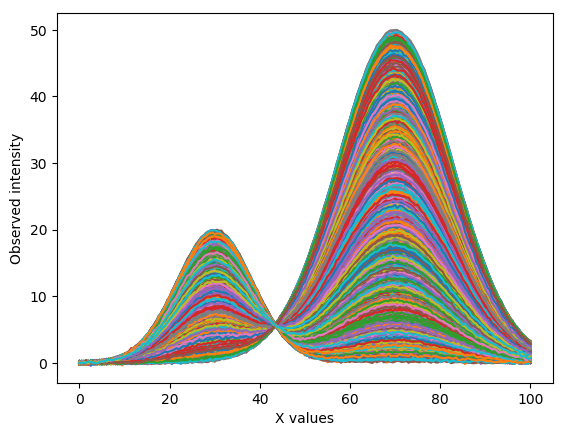

(1000, 201)


In [2]:
#
# Generating fake data
#

x = collect(0:0.5:100)
~, prs = gaussiennes([20.,50.],[30.,70.],[10.,15.],x)

nbexp = 1000

C = rand(nbexp)
C = [C 1.0.-C]

D = C*prs' .+0.1.*randn(size(C*prs'))

#
# Plot
#

plot(x,D')

xlabel("X values")
ylabel("Observed intensity")

println("First dim should be equalt to nbexp = $(nbexp)")
println(size(D))

We create an mlexplorer object called 'explo'

In [3]:
explo = mlexplorer(D)

PyObject <rampy.ml_exploration.mlexplorer object at 0x7f9a9563f668>

We will explore the data with a Non-Negative Matrix factorisation algorithm, training it with 2 components on 70% of the data. MinMax scaling is performed before training.

In [4]:
explo.algorithm = "NMF"
explo.nb_compo = 2
explo.test_size = 0.3
explo.scaler = "MinMax"
explo.fit()